# Predict the diabetes based on diagnostic measures

*   Élément de liste
*   Élément de liste



#### About DATA:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Columns
> 1.Pregnancies = Number of times pregnant

> 2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> 3.BloodPressure = Diastolic blood pressure (mm Hg)

> 4.SkinThickness = Triceps skin fold thickness (mm)

> 5.Insulin = 2-Hour serum insulin (mu U/ml)

> 6.BMI = Body mass index (weight in kg/(height in m)^2)

> 7.DiabetesPedigreeFunction = Diabetes pedigree function

> 8.Age = Age (years)

> 9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# execute  !pip install new_pkg_name for installing new packages

In [ ]:
data = pd.read_csv('pima-data.csv')

In [ ]:
data.shape

(768, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [ ]:
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8719d8c9d0>,
      dtype=object)

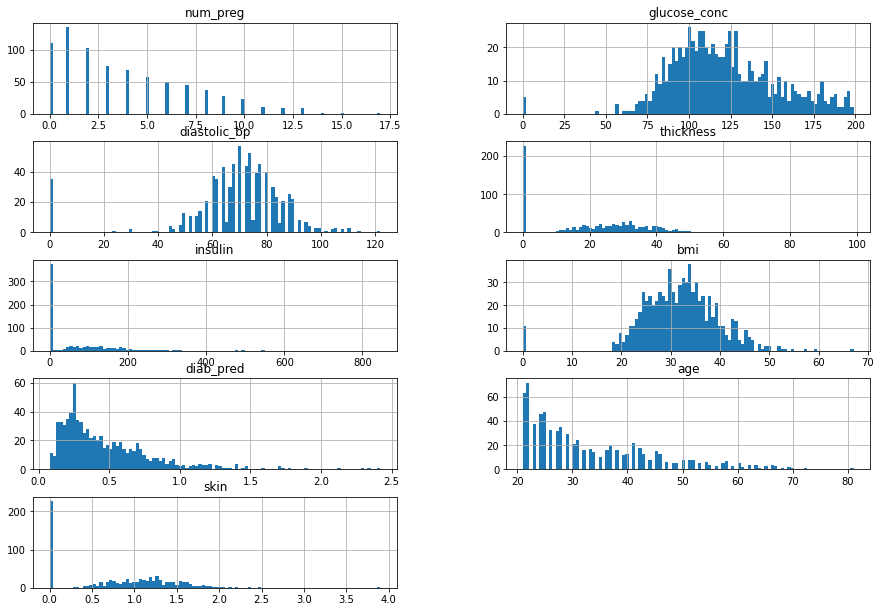

In [ ]:
# Histogram
columns = list(data)[0:-1]
data[columns].hist(stacked = False, bins = 100, figsize = (15, 30), layout = (14,2))

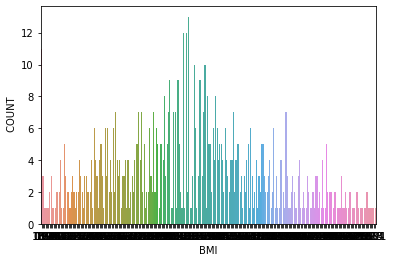

In [ ]:
sns.barplot(x= data.bmi.value_counts().index, y = data.bmi.value_counts().values)
plt.xlabel('BMI')
plt.ylabel(" COUNT")
plt.show()

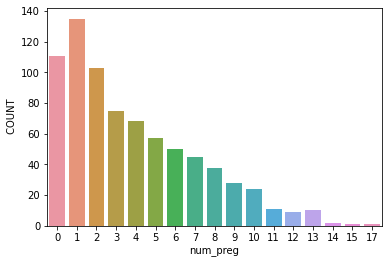

In [ ]:
sns.barplot(x= data.num_preg.value_counts().index, y = data.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel(" COUNT")
plt.show()

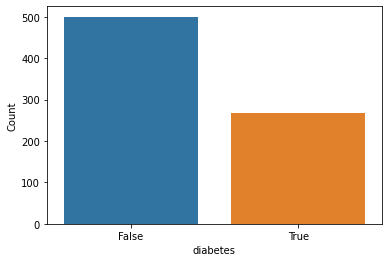

In [ ]:
sns.countplot(data.diabetes)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

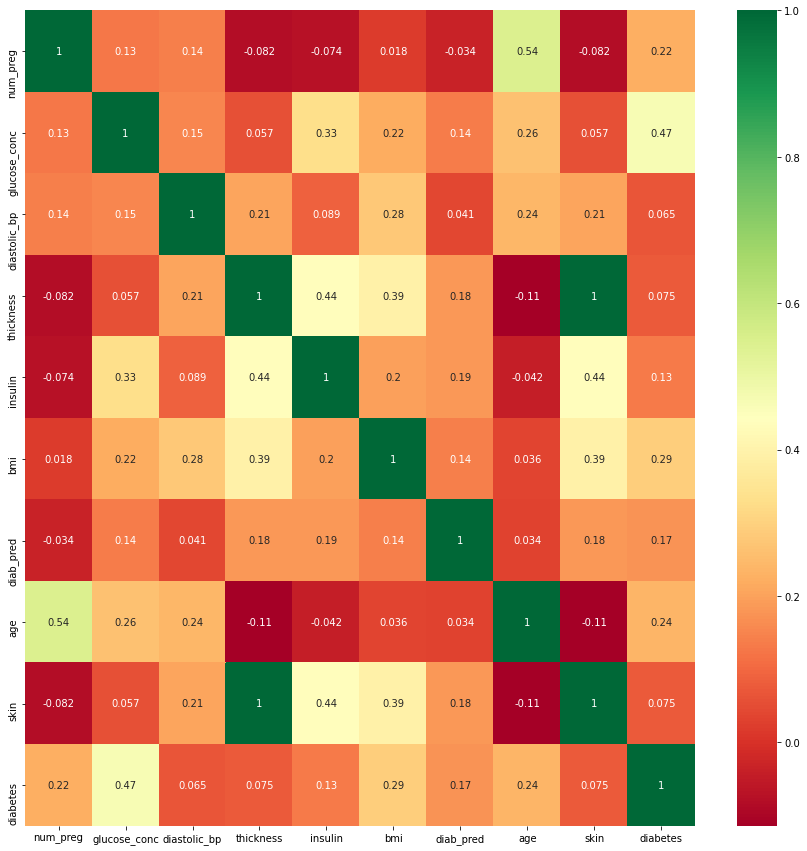

In [ ]:
# correalation matrix
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (15,15))
g = sns.heatmap(data[top_corr_features].corr(), annot= True, cmap = 'RdYlGn')

In [ ]:
#changing boolean to number

diabetes_map = {True: 1, False: 0}
data['diabetes']= data['diabetes'].map(diabetes_map)

In [ ]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [ ]:
n_true= len(data.loc[data['diabetes']== True])
n_false= len(data.loc[data['diabetes']== False])

print('Number of True Cases: {0}({1:2.2f}%)'.format(n_true, (n_true/(n_true+n_false))*100))
print('Number of False Cases: {0}({1:2.2f}%)'.format(n_false, (n_false/(n_true+n_false))*100))

Number of True Cases: 268(34.90%)
Number of False Cases: 500(65.10%)


In [ ]:
#Start Building the models
from sklearn.model_selection import train_test_split

In [ ]:
#spliting train and test data
x= data.drop(['diabetes'], axis= 1)
y= data.diabetes.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [ ]:
#from sklearn.preprocessing import Imputer
#fill_values = Imputer(missing_values=0, strategy = 'mean', axis =0)

from sklearn.impute import SimpleImputer 
fill_values = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
# Support Vector Machine SVM Algorithm

from sklearn.svm import SVC
svm = SVC(random_state= 1)
svm.fit(X_train, y_train)
print("SVC accuracy: {: .2f}%".format(svm.score(X_test, y_test)*100))

SVC accuracy:  79.22%


In [ ]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
print("NB accuracy: {: .2f}%".format(nb.score(X_test, y_test)*100))

NB accuracy:  78.57%


In [ ]:
# K Nearest Neighbors KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("KNN accuracy: {: .2f}%".format(knn.score(X_test, y_test)*100))

KNN accuracy:  72.08%


In [ ]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest accuracy: {: .2f}%".format(rf.score(X_test, y_test)*100))

Random Forest accuracy:  79.22%


In [ ]:
# XG boost

import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print(" XG boost: {: .2f}%".format(xg.score(X_test, y_test)*100))

 XG boost:  81.82%


In [ ]:
# Make prediction for a new data entry with SVM model

new_values=[11,	19,	6,	3,	99,	30.1,	0.398,	99,	0.062]
data= np.array(new_values, ndmin=2)
prediction = svm.predict(data)
if prediction == 1:
  print("diabetes status: TRUE")
else: 
  print("diabetes status: FALSE")

diabetes status: FALSE


In [ ]:
# Make prediction for a new data entry with XG boost Model

new_values=[1,	189,	60,	23,	846,	30.1,	0.398,	59,	0.9062]
data= np.array(new_values, ndmin=2)
prediction = xg.predict(data)
if prediction == 1:
  print("diabetes status: TRUE")
else: 
  print("diabetes status: FALSE")

diabetes status: TRUE
